In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.svm import SVC

data = load_iris()
train = data.data
label = data.target
print(data.target_names)
# データと正解ラベルを学習用とテスト用に分割する
data_train, data_test, label_train, label_test = train_test_split(train, label)
# 何かしらの予測をする。例として線形SVMで予測している
classifier = SVC(kernel='linear')
label_pred = classifier.fit(data_train, label_train).predict(data_test)

['setosa' 'versicolor' 'virginica']


# 混同行列

In [9]:
# 混同行列を計算する
cm = confusion_matrix(label_test, label_pred)
print(cm)
#http://sucrose.hatenablog.com/entry/2013/05/25/133021
#尺度というよりはどの正解ラベルのデータをどのラベルに何個分類したかという表

[[13  0  0]
 [ 0  7  2]
 [ 0  1 15]]


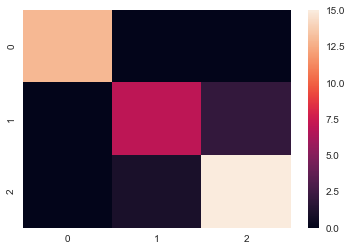

In [68]:
import seaborn as sns; sns.set()
ax = sns.heatmap(cm)

# 正解率

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(label_test, label_pred)

0.9210526315789473

# F値

Precision、RecallとF値とsupport(正解ラベルのデータの数)

In [29]:
from sklearn.metrics import classification_report
target_names = [data.target_names[0], data.target_names[1], data.target_names[2]]
print(classification_report(label_test, label_pred, target_names=target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      0.89      0.94         9
  virginica       0.93      1.00      0.97        14

avg / total       0.98      0.97      0.97        38



# 多クラス分類の平均の取り方：マイクロ平均、マクロ平均

$$Precision_{}^{micro average} =
\frac{TP1+TP2+TP3}{TP1+TP2+TP3+FP1+FP2+FP3}$$

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

classifier = SVC(kernel='linear')
label_pred = classifier.fit(data_train, label_train).predict(data_test)
f1 = f1_score(label_test, label_pred, average='micro')
print("f1_score micro:",f1)

f1_score micro: 0.9736842105263158


$$Precision_{}^{macro average} =
\frac{Precision1+Precision2+Precision3}{3}$$

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

classifier = SVC(kernel='linear')
label_pred = classifier.fit(data_train, label_train).predict(data_test)
f1 = f1_score(label_test, label_pred, average='macro')
print("f1_score macro:",f1)

f1_score macro: 0.9688979039891819


# 分類モデルを比較する

>誤りが許されない問題の場合、例えば「適合率が 0.9 以上にならないモデルは採用しない」という最 低ラインを決めて、その上で F 値が高くなるようにパラメーターチューニングをして、モデル選択をす るのが良いでしょう。

本には詳しく書かれてないが、ROC曲線やAUCの評価値も使われる。

# 回帰の評価

## 平均二乗誤差

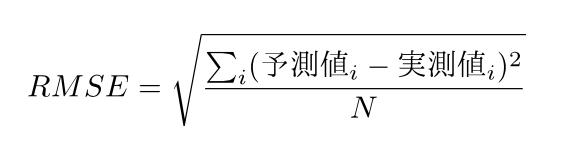

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

def sqrt_error(predicts, actuals):
    from math import sqrt
    sum = 0
    #Pythonではforは遅くなるよ。
    for predict, actual in zip(predicts, actuals):
        sum += (predict - actual) ** 2
    print(sqrt(sum / len(predicts)))

classifier = SVC(kernel='linear')
label_pred = classifier.fit(data_train, label_train).predict(data_test)
#math 二乗誤差
sqrt_error(label_pred, label_test)

from sklearn.metrics import mean_squared_error 
from math import sqrt
#sklearn 二乗誤差
print(sqrt(mean_squared_error(label_test, label_pred)))


0.16222142113076254
0.16222142113076254


# 決定係数

回帰では平均二乗誤差と当てはまりの良さを表現する決定係数R2を使う。

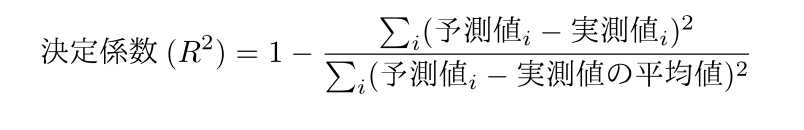

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data_train, label_train)
print("score:", lr.score(data_test, label_test))
from sklearn.metrics import r2_score
r2 = r2_score(label_test, lr.predict(data_test))
print("r2_score:",r2)

score: 0.9254785945342148
r2_score: 0.9254785945342148


# まとめ

分類の評価指標として正解率、適合率、再現率、F値があった。データの偏りを考慮するには正解率では足りず、適合率、再現率について確認した。また、F値を使用してどちらに偏ってるのかを確認した。    
回帰の評価指標として平均二乗誤差と決定係数について確認した。    
A/Bテストにおいては機械学習の評価観点とビジネス上のKPIの観点で分けて考えることが重要。